Shayshu N-R
1005035196

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import math
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
def loadData():
  with np.load("notMNIST.npz") as data:
    Data, Target = data ["images"], data["labels"]
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data = Data[randIndx]/255.
    Target = Target[randIndx]
    trainData, trainTarget = Data[:10000], Target[:10000]
    validData, validTarget = Data[10000:16000], Target[10000:16000]
    testData, testTarget = Data[16000:], Target[16000:]
  return trainData, validData, testData, trainTarget, validTarget, testTarget

In [ ]:
def convertOneHot(trainTarget, validTarget, testTarget):
    newtrain = np.zeros((trainTarget.shape[0], 10))
    newvalid = np.zeros((validTarget.shape[0], 10))
    newtest = np.zeros((testTarget.shape[0], 10))

    for item in range(0, trainTarget.shape[0]):
        newtrain[item][trainTarget[item]] = 1
    for item in range(0, validTarget.shape[0]):
        newvalid[item][validTarget[item]] = 1
    for item in range(0, testTarget.shape[0]):
        newtest[item][testTarget[item]] = 1
    return newtrain, newvalid, newtest

In [ ]:
def shuffle(trainData, trainTarget):
    np.random.seed(421)
    randIndx = np.arange(len(trainData))
    target = trainTarget
    np.random.shuffle(randIndx)
    data, target = trainData[randIndx], target[randIndx]
    return data, target

In [ ]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()

In [ ]:
trainTarget, validTarget, testTarget = convertOneHot(trainTarget, validTarget, testTarget)

# Neural Networks using Numpy:


## Helper Functions:


$ReLU(x) = max(x, 0)$

$\sigma (z)_j = \frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}} , \hspace{2mm}j = 1, ... K\hspace{2mm} for\hspace{2mm} K \hspace{2mm}classes$

$\hat{y} = \mathbf{W}^T \mathbf{X} + b = z$

$\mathcal{L}_{CE} = -\sum_{n=1}^{N} \sum_{k=1}^{K} y_k^{(n)} log(p_{k}^{(n)}) =  -\mathbf{y} \cdot log(\sigma (\mathbf{o}))$

$\frac{\partial \mathcal{L_{CE}}}{\partial \mathbf{o}} = \frac{\partial \mathcal{L}_{CE}}{\partial \sigma (\mathbf{o})} \cdot \frac{\partial \sigma (\mathbf{o})}{\partial \mathbf{o}}$

$\frac{\partial \mathcal{L}_{CE}}{\partial \sigma (\mathbf{o})} = -\mathbf{y} \cdot \frac{1}{\sigma (\mathbf{o})}$

$\frac{\partial \sigma (\mathbf{o})}{\partial \mathbf{o}} = \sigma (\mathbf{o}) \cdot (1 - \sigma(\mathbf{o}))$

$\therefore \frac{\partial \mathcal{L_{CE}}}{\partial \mathbf{o}} = \sigma (\mathbf{o}) - y$

In [ ]:
def relu(x):
  return np.maximum(0, x)

In [ ]:
def softmax(x):
  x = x - np.max(x)
  return np.exp(x) / np.sum(np.exp(x), axis = 1, keepdims = True)

In [ ]:
def compute(X, W, b):
  return np.add(np.matmul(X, W), b)

In [ ]:
def averageCE(y, y_hat):
  log_pred = np.log(y_hat)

  return -1 * np.mean(y * log_pred)

In [ ]:
def gradCE(targets, input):
  return softmax(input) - targets

##Backpropagation derivation:

Architecture:
*   3 layers - 1 input, 1 hident with ReLU, and 1 output with softmax
*   Input layer: $\mathbf{x}$ has 784 elements
*   Hidden layer: $\mathbf{h} = ReLU(\mathbf{W}_h\mathbf{x} + \mathbf{b}_h)$ has H elements
*   Output layer: $\mathbf{p} = softmax(\mathbf{o}) = softmax(\mathbf{W}_o\mathbf{h} + \mathbf{b}_o)$ has 10 elements 
*   $\mathcal{L}_{CE} = -\sum_{n=1}^{N} \sum_{k=1}^{K} y_k^{(n)} log(p_{k}^{(n)}) =  -\mathbf{y} \cdot log(\sigma (\mathbf{o}))$





$\frac{\partial \mathcal{L}}{\partial \mathbf{W}_o} = \mathbf{h}^T(\sigma (\mathbf{o}) - \mathbf{y})$

$\frac{\partial \mathcal{L}}{\partial \mathbf{b}_o} = \sigma (\mathbf{o}) - \mathbf{y}$

$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_h} = 

  \begin{cases} 
      \mathbf{x}^T(\sigma(\mathbf{o}) - \mathbf{y}) \cdot \mathbf{W}_o  & \mathbf{W}_{h}\mathbf{x} + \mathbf{b}_h > 0  \\
      0 & otherwise
   \end{cases}

$


$\frac{\partial \mathcal{L}}{\partial \mathbf{b}_h} = 
  \begin{cases} 
      (\sigma(\mathbf{o}) - \mathbf{y}) \cdot \mathbf{W}_o & \mathbf{W}_{h}\mathbf{x} + \mathbf{b}_h > 0  \\
      0 & otherwise
   \end{cases} 
$

## Learning:

In [ ]:
def intiWeights(sizes):
  scale_1 = np.sqrt((2.0 / (sizes[0][0] + sizes[0][1])))
  scale_2 = np.sqrt((2.0 / (sizes[1][0] + sizes[1][1]))) 

  Wh = np.random.normal(loc=0.0, scale=scale_1, size=sizes[0])
  Wo = np.random.normal(loc=0.0, scale=scale_2, size=sizes[1])
  
  return Wh, Wo

In [ ]:
def initBias(sizes):
  bo = np.zeros((sizes[0][0], sizes[0][1]))
  bh = np.zeros((sizes[1][0], sizes[1][1]))
  
  return bo, bh

In [ ]:
def initMomentum(sizes, value):
  vWh = np.full(sizes[0], value)
  vWo = np.full(sizes[1], value) 
  vbh = np.zeros(sizes[2]) 
  vbo = np.zeros(sizes[3])

  return vWh, vWo, vbh, vbo

In [ ]:
def backProp(x0, x1, x2, s1, s2, Wh, Wo, bh, bo, y):
  # dl_do = softmax(s2) - y
  dL_do = ( 1.0/ 10000 ) * gradCE(y, s2)

  # # dL_dWo = x2^T * (softmax(s2) - y)
  dL_dWo = np.matmul(np.transpose(s1), dL_do)

  # dL_dbo = (softmax(s2) - y) but in the right shape...
  dL_dbo = np.matmul(np.ones((1, y.shape[0])), dL_do)

  # dL_dWh = x0 * pw(Relu) *(softmax(s2) - y) * W^T
  ds1_dx1 = np.where(s1 > 0, 1, 0)
  dL_dWh = np.matmul(dL_do, np.transpose(Wo))
  dL_dWh = np.matmul(np.transpose(x0), ds1_dx1 * dL_dWh)

  # dL_dbh = pw(Relu) * (softmax(s2) - y) * W^T
  dL_dbh = np.matmul(dL_do, np.transpose(Wo))
  dL_dbh = np.where(s1 > 0, dL_dbh, 0)
  dL_dbh = np.matmul(np.ones((1, s1.shape[0])), dL_dbh)
 
  return dL_dWo, dL_dbo, dL_dWh, dL_dbh 

In [ ]:
def newMomentum(vold, dL_dx, alpha=0.1, gamma=0.9):
  vWh = (gamma * vold[0]) + (alpha * dL_dx[0])
  vWo = (gamma * vold[1]) + (alpha * dL_dx[1]) 
  vbh = (gamma * vold[2]) + (alpha * dL_dx[2]) 
  vbo = (gamma * vold[3]) + (alpha * dL_dx[3]) 

  return vWh, vWo, vbh, vbo

In [ ]:
def gradientDescent(Wh_old, Wo_old, bh_old, bo_old, vWh, vWo, vbh, vbo):
  Wh = Wh_old - vWh
  Wo = Wo_old - vWo
  bh = bh_old - vbh
  bo = bo_old - vbo
  
  return Wh, Wo, bh, bo

In [ ]:
def accuracy(prediction, target):
  y_hat = np.argmax(prediction, axis = 1)
  y = np.argmax(target, axis = 1)

  result = np.equal(y, y_hat)
  accuracy = np.sum(result) / target.shape[0]
  
  return accuracy

In [ ]:
def train(epochs=10, learning_rate=0.1, momentum=0.9):
  # Get the data and reshape it...
  trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
  trainTarget, validTarget, testTarget = convertOneHot(trainTarget, validTarget, testTarget)

  trainData = trainData.reshape((trainData.shape[0], -1))
  validData = validData.reshape((validData.shape[0], -1))
  testData = testData.reshape((testData.shape[0], -1))

  # Intitialize weights, bias, and descent...
  bo, bh = initBias([(1, 10), (1, 1000)])
  Wh, Wo = intiWeights([(784, 1000), (1000, 10)])
  vWh, vWo, vbh, vbo = initMomentum([(784, 1000), (1000, 10), (1, 1000), (1, 10)], 1e-5)

  # Loss and accuracy variables...
  itters = []
  train_loss, val_loss, test_loss = [], [], []
  train_acc, val_acc, test_acc = [], [], []


  for itteration in range(epochs):
    # Compute forward propagation for the training set...
    s1 = compute(trainData, Wh, bh)
    x1 = relu(s1)

    s2 = compute(x1, Wo, bo)
    x2 = softmax(s2)

    # Compute forward propagation for the validation set...
    val_s1 = compute(validData, Wh, bh)
    val_x1 = relu(val_s1)

    val_s2 = compute(val_x1, Wo, bo)
    val_x2 = softmax(val_s2)

    # Compute forward propagation for the testing set...
    test_s1 = compute(testData, Wh, bh)
    test_x1 = relu(test_s1)

    test_s2 = compute(test_x1, Wo, bo)
    test_x2 = softmax(test_s2)

    # Calculate the loss and accuracy for the training set...
    train_loss.append(averageCE(trainTarget, x2))
    train_acc.append(accuracy(x2, trainTarget))

    # Calculate the loss and accuracy for the validation set...
    val_loss.append(averageCE(validTarget, val_x2))
    val_acc.append(accuracy(val_x2, validTarget))

    # Calculate the loss and accuracy for the testing set...
    test_loss.append(averageCE(testTarget, test_x2))
    test_acc.append(accuracy(test_x2, testTarget))

    # Compute back propagation...
    # Use the formulas developed in 1.2 to compute the gradient of the loss 
    # function with respect to Wo, bo, Wh, and bh....
    dL_dWo, dL_dbo, dL_dWh, dL_dbh = backProp(trainData, x1, x2, s1, s2, Wh, Wo, bh, bo, trainTarget)

    # Now get the new momentum/descent terms using the partial derivatives 
    # calculated...
    vWh, vWo, vbh, vbo = newMomentum([vWh, vWo, vbh, vbo], [dL_dWh, dL_dWo, dL_dbh, dL_dbo], alpha=learning_rate, gamma=momentum)

    # Compute the new values of the weights and bias using gradient descent
    Wh, Wo, bh, bo = gradientDescent(Wh, Wo, bh, bo, vWh, vWo, vbh, vbo)

    itters.append(itteration)

  return train_loss, val_loss, test_loss, train_acc, val_acc, test_acc, itters

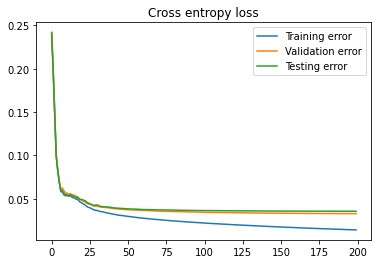

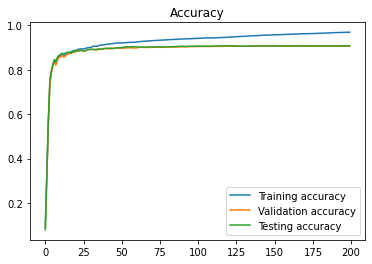

Best training loss: 0.01400416450371402
Best validation loss: 0.03275416173423728
Best testing loss: 0.035540894134529426
Best training accuracy: 0.969
Best validation accuracy: 0.9071666666666667
Best testing accuracy: 0.907856093979442


In [ ]:
train_loss, val_loss, test_loss, train_acc, val_acc, test_acc, itters = train(epochs=200)

plt.plot(train_loss, label="Training error")
plt.plot(val_loss, label="Validation error")
plt.plot(test_loss, label="Testing error")
plt.title("Cross entropy loss")
plt.legend()
plt.show()

plt.plot(train_acc, label="Training accuracy")
plt.plot(val_acc, label="Validation accuracy")
plt.plot(test_acc, label="Testing accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

print("Best training loss:", np.min(train_loss))
print("Best validation loss:", np.min(val_loss))
print("Best testing loss:", np.min(test_loss))

print("Best training accuracy:", np.max(train_acc))
print("Best validation accuracy:", np.max(val_acc))
print("Best testing accuracy:", np.max(test_acc))